# Import Library

In [46]:
import pandas as pd
import datetime
import calendar
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
from prettytable import PrettyTable as pt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from pickle import load,dump
sns.set(style="darkgrid")
plt.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (20, 10)

# Panggil Data

In [47]:
data = pd.read_csv('./data/Hasil Tes SBK LPDP Gelombang I - 2021 (Responses) - Form Responses 1.csv',skipinitialspace = True)
data.head()

,Timestamp,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,6/24/2021 15:54:15,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6,Universitas Indonesia
1,6/24/2021 15:54:22,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8,UCL
2,6/24/2021 15:54:54,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7,KTH Sweden
3,6/24/2021 15:56:06,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4,UGM
4,6/24/2021 15:56:28,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7,University of Birmingham


# Check Duplikasi Data

<p style="font-size:24px">Dapat dilihat dari baris kode dibawah bahwa dataset tidak memiliki baris yang terduplikasi</p>

In [48]:
duplicatedDataCount = data.duplicated().sum()
print(f'Jumlah data yang terduplikasi adalah sebanyak = {duplicatedDataCount}')

Jumlah data yang terduplikasi adalah sebanyak = 0


# Nomor 1

<p style="font-size:24px">Eksplorasi Kolom terakhir saya taruh di bagian Check Data Null</p>

[Klik untuk menuju bagian Check Data Null](#another_cell)

![Alt text](./images/no1.png)

## Eksplorasi kolom Timestamp 

<p style="font-size:24px">Saya memutuskan hanya untuk mengambil bulan dan tahun dari kolom Timestamp</p>

In [49]:
timestamp = data["Timestamp"]
newTimeStamp = []
for dates in timestamp:
	datem = datetime.datetime.strptime(dates, "%m/%d/%Y %H:%M:%S")
	newTimeStamp.append(str(calendar.month_name[datem.month]+" "+str(datem.year)).strip())
data["Timestamp"] = newTimeStamp
data.head()

,Timestamp,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,June 2021,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6,Universitas Indonesia
1,June 2021,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8,UCL
2,June 2021,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7,KTH Sweden
3,June 2021,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4,UGM
4,June 2021,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7,University of Birmingham


## Eksplorasi Kolom Beasiswa

<p style="font-size:24px">Tidak ada hal yang harus diubah dari kolom ini karena semua isi dari kolom ini sudah benar</p>

In [50]:
data["Jenis Beasiswa "].value_counts()

Reguler     260
Targeted    118
Afirmasi     93
Name: Jenis Beasiswa , dtype: int64

## Eksplorasi Kolom Tingkat Pendidikan yang Dituju

<p style="font-size:24px">Tidak ada hal yang harus diubah dari kolom ini karena isi dari seluruh kolom ini sudah benar</p>

In [51]:
data["Tingkat Pendidikan yang Dituju"].value_counts()

S2    415
S3     56
Name: Tingkat Pendidikan yang Dituju, dtype: int64

## Eksplorasi Kolom Negara Tujuan Kuliah

<p style="font-size:24px">Tidak ada hal yang harus diubah dari kolom ini karena isi dari kolom data ini sudah benar</p>

In [52]:
data["Negara Tujuan Kuliah"].value_counts()

Luar Negeri     257
Dalam negeri    214
Name: Negara Tujuan Kuliah, dtype: int64

## Eksplorasi Kolom Bidang Studi yang dipilih saat mendaftar

<p style="font-size:24px">Mengubah seluruh row menjadi UPPERCASE karena ada beberapa data yang seharusnya sama tetapi penulisan huruf kapital dan huruf kecil nya berbeda. Contoh: TRP dan trp</p>

In [53]:
data["Bidang Studi yang dipilih saat mendaftar"] = [i.upper() for i in data["Bidang Studi yang dipilih saat mendaftar"]]
data["Bidang Studi yang dipilih saat mendaftar"].value_counts()

TRP    111
BUS     55
PUB     23
SOS     16
FOR     16
      ... 
TEK      1
MET      1
KES      1
ECT      1
FIN      1
Name: Bidang Studi yang dipilih saat mendaftar, Length: 72, dtype: int64

## Eksplorasi kolom Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP

<p style="font-size:24px">Tidak ada hal yang harus diubah dari kolom ini karena value dari kolom ini sudah benar</p>

In [54]:
data["Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP "].value_counts()

Tidak             334
Ya, dengan Loa    137
Name: Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP , dtype: int64

## Eksplorasi Kolom Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?

<p style="font-size:24px">Tidak ada hal yang harus diubah dari kolom ini karena seluruh kolom ini isinya sudah benar yaitu "Ya" dan "Tidak"</p>

In [55]:
data["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"].value_counts()

Ya       347
Tidak    124
Name: Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?, dtype: int64

## Eksplorasi Jumlah Jawaban Benar pada Tes Penalaran Verbal

<p style="font-size:24px">Dapat dilihat dibawah bahwa seluru tipe data kolom ini sudah seharusnya yaitu integer dan tidak ditemukan data yang aneh sehingga tidak ada hal yang harus diubah dari kolom ini</p>

In [56]:
print(f'Tipe data dari kolom ini adalah {data["Jumlah Jawaban Benar pada Tes Penalaran Verbal"].dtypes}')

Tipe data dari kolom ini adalah int64


## Jumlah Jawaban Benar pada Tes Kuantitatif

<p style="font-size:24px">Dapat dilihat dibawah bahwa seluru tipe data kolom ini sudah seharusnya yaitu integer dan tidak ditemukan data yang aneh sehingga tidak ada hal yang harus diubah dari kolom ini</p>

In [57]:
print(f'Tipe data dari kolom ini adalah {data["Jumlah Jawaban Benar pada Tes Kuantitatif"].dtypes}')

Tipe data dari kolom ini adalah int64


## Jumlah Jawaban Benar pada Tes Pemecahan Masalah

<p style="font-size:24px">Dapat dilihat dibawah bahwa seluru tipe data kolom ini sudah seharusnya yaitu integer dan tidak ditemukan data yang aneh sehingga tidak ada hal yang harus diubah dari kolom ini</p>

In [58]:
print(f'Tipe data dari kolom ini adalah {data["Jumlah Jawaban Benar pada Tes Pemecahan Masalah"].dtypes}')

Tipe data dari kolom ini adalah int64


# Check Data yang Null

<a id='another_cell'></a>

<p style="font-size:24px">Dapat dilihat dari baris kode dibawah bahwa kolom terakhir memiliki <strong>91</strong> baris kosong</p>

In [59]:
data.isnull().sum()

Timestamp                                                                                0
Jenis Beasiswa                                                                           0
Tingkat Pendidikan yang Dituju                                                           0
Negara Tujuan Kuliah                                                                     0
Bidang Studi yang dipilih saat mendaftar                                                 0
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                   0
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?     0
Jumlah Jawaban Benar pada Tes Penalaran Verbal                                           0
Jumlah Jawaban Benar pada Tes Kuantitatif                                                0
Jumlah Jawaban Benar pada Tes Pemecahan Masalah                                          0
[optional] Kampus/universitas tujuan saat ini (pilihan 1)                               91

<p style="font-size:24px">Agar kolom terakhir tidak di drop begitu saja, maka saya akan mengeksplorasi kolom terakhir tersebut sebelum memutuskan harus apa yang harus dilakukan terhadap kolom terakhir ini</p>

## Eksplorasi Kolom Terakhir

### Karena kolom yang memiliki data NaN adalah kolom terakhir yang tipe datanya adalah kategorikal maka saya akan drop rows yang memiliki data NaN

In [60]:
dataShape = data.shape
numOfNanRows = data.isnull().sum().sum()
print(f'Shape DataFrame sebelum data NaN dihapus: {dataShape}')
print(f'Jumlah baris yang NaN adalah sebanyak {numOfNanRows} baris')

# Drop nan rows in dataframe
text = ' AFTER DROPPING NAN VALUES '
print(f'\n{text:-^50}\n')
data.dropna(inplace = True)

dataShape = data.shape
numOfNanRows = data.isnull().sum().sum()
print(f'Shape DataFrame stelah data NaN dihapus: {dataShape}')
print(f'Jumlah baris yang NaN adalah sebanyak {numOfNanRows} baris')

Shape DataFrame sebelum data NaN dihapus: (471, 11)
Jumlah baris yang NaN adalah sebanyak 91 baris

----------- AFTER DROPPING NAN VALUES ------------

Shape DataFrame stelah data NaN dihapus: (380, 11)
Jumlah baris yang NaN adalah sebanyak 0 baris


### Remove White Spaces Pada Kolom Terakhir

In [61]:
lastCol = data["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] 
def removeWhiteSpace(val):
    val = val.strip()
    val = re.sub("\s\s+" , " ", val)
    return val
lastCol = lastCol.astype(str)
lastCol.apply(removeWhiteSpace)

0               Universitas Indonesia
1                                 UCL
2                          KTH Sweden
3                                 UGM
4            University of Birmingham
                    ...              
465           Universitas Gadjah Mada
466                                UI
468                 Monash university
469                                UI
470    Australian National University
Name: [optional] Kampus/universitas tujuan saat ini (pilihan 1), Length: 380, dtype: object

### Membenarkan Typo Pada Kolom Terakhir

In [62]:
# UI --> Universitas Indonesia
lastCol = lastCol.replace(["ui","Universitas Indonesia","UNIVERSITAS INDONESIA","universitas indonesia","Ui"], "UI")

# UNY -- Universitas Negeri Yogyakarta
lastCol = lastCol.replace("Universitas Negeri Yogyakarta","UNY")

# ITB --> Institut Teknologi Bandung
lastCol = lastCol.replace(["Itb","Institut Teknologi Bandung"], "ITB")

# UGM --> Universitas Gadjah Mada
lastCol = lastCol.replace(["Ugm","ugm","Universitas Gadjah Mada"], "UGM")

# UOM --> University of Manchester
lastCol = lastCol.replace(["University of Manchester","The University of Manchester"], "UOM")

# UNPAD --> Universitas Padjadjaran
lastCol = lastCol.replace(["unpad","Universitas Padjadjaran","Unpad"], "UNPAD")

# UOB --> University of Birmingham
lastCol = lastCol.replace(["university of birmingham","University of Birmingham","Universitas Padjadjaran"], "UOB")

# WUR --> Wageningen University and Research
lastCol = lastCol.replace(["wur","Wageningen University and Research"], "WUR")

# IPB --> Institut Pertanian Bogor
lastCol = lastCol.replace("Institut Pertanian Bogor", "IPB")

# UNAIR --> Institut Pertanian Bogor
lastCol = lastCol.replace("Universitas Airlangga", "UNAIR")

# TU Delft   --> Delft University of Technology
lastCol = lastCol.replace(["TU DELFT","Tu Delft"], "Tu delft")

# Edin --> University of Edinburgh
lastCol = lastCol.replace(["Edinburgh","University of Edinburgh"], "Edin")

# UPI --> Universitas Pendidikan Indonesia
lastCol = lastCol.replace("Universitas Pendidikan Indonesia", "UPI")

# UM --> Universitas Negeri Malang
lastCol = lastCol.replace("Universitas Negeri Malang", "UM")

# KCL --> King's College London
lastCol = lastCol.replace("King's College London", "KCL")

# UCL --> University College London
lastCol = lastCol.replace("ucl", "UCL")

# ICl --> Imperial College London
lastCol = lastCol.replace("Imperial College London", "ICL")

# NUS --> National University of Singapore
lastCol = lastCol.replace("Nus", "NUS")

# UL --> University of Leeds
lastCol = lastCol.replace(["Univ of Leeds","University of Leeds"], "UL")

# MICH --> University of Michigan
lastCol = lastCol.replace(["University of Michigan","Uni of Michigan"], "MICH")

# UNHAS --> Universitas Hasanuddin
lastCol = lastCol.replace(["Unhas","Universitas hasanuddin"], "UNHAS")

# UPI --> Universitas Pendidikan Indonesia
lastCol = lastCol.replace(["Univ Pendidikan Indonesia/ UPI","Upi","UPI BANDUNG"], "UPI")


# Melihat Summary Dataset

In [63]:
data.describe()

,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah
count,380.000000,380.000000,380.000000
mean,15.042105,14.413158,6.134211
std,2.796212,4.308712,1.827780
min,0.000000,0.000000,0.000000
25%,13.000000,12.000000,5.000000
50%,15.000000,15.000000,6.000000
75%,17.000000,17.000000,7.000000
max,23.000000,25.000000,12.000000


In [64]:
def getDatasets(df):
    X = df.drop(["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"],axis=1)
    y = df["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"]
    return X,y

In [65]:
X,y = getDatasets(data)
numericalDataX = X.select_dtypes(include=['int64', 'float64']).columns
categoricalDataX = X.select_dtypes(include=['object', 'bool']).columns
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [66]:
data.head()

,Timestamp,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,June 2021,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6,Universitas Indonesia
1,June 2021,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8,UCL
2,June 2021,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7,KTH Sweden
3,June 2021,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4,UGM
4,June 2021,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7,University of Birmingham


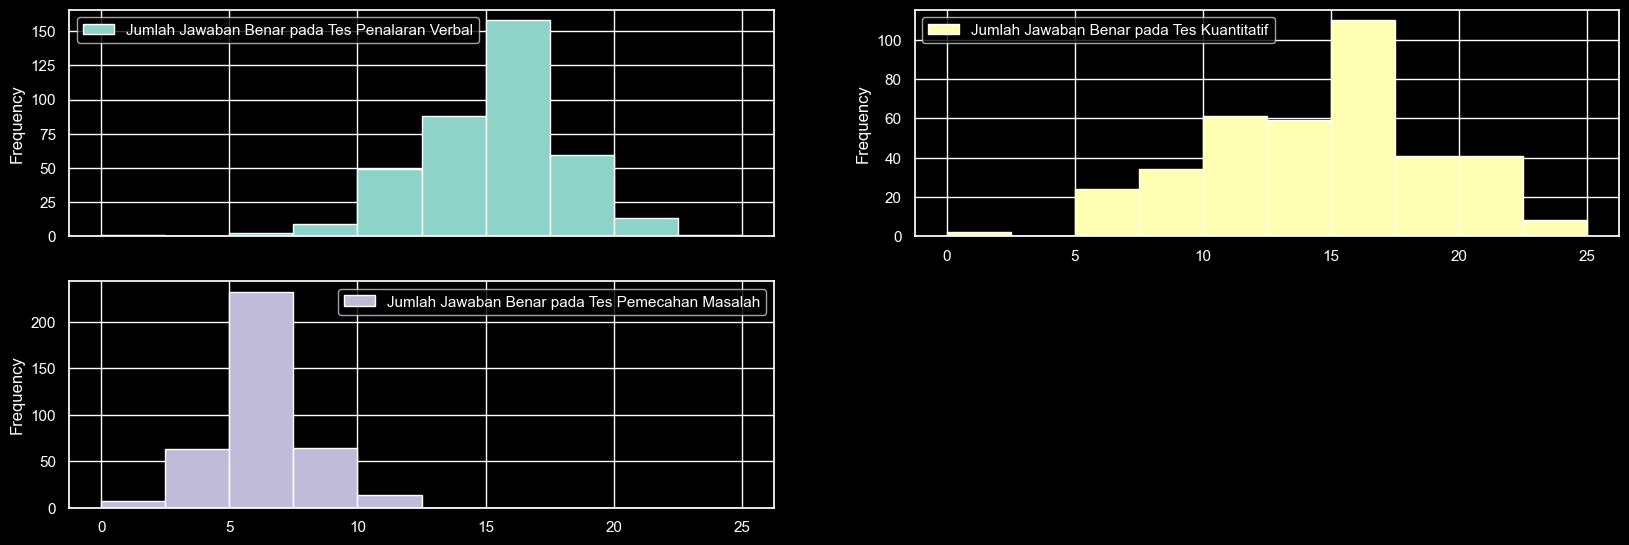

In [67]:
data.loc[:,numericalDataX].plot.hist(subplots=True, legend=True, layout=(3, 2))
plt.show()

In [68]:
transformer = ColumnTransformer(transformers = [
    ('tnf1',OneHotEncoder(sparse=False,drop="first",handle_unknown='ignore'),categoricalDataX),
    ('tnf2',RobustScaler(),numericalDataX)
])
X_cols = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
models = [LogisticRegression(),KNeighborsClassifier(n_neighbors = 4),SVC(),GaussianNB(),DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=1,max_features='auto'),RandomForestClassifier(criterion='gini', n_estimators=700 ,min_samples_split=10,min_samples_leaf=1,max_features='auto',oob_score=True,random_state=1,n_jobs=-1),LinearDiscriminantAnalysis(),AdaBoostClassifier(),GradientBoostingClassifier()]
modelNames = ['Logistic Regression','KNN','SVM','Naive-Bayes','Decision Tree','RandomForest','Linear Discriminant Analysis','Ada Boost','Gradient Boosting']
modelDict = {}
for model,names in zip(models,modelNames):
    model.fit(X_train,y_train)
    modelDict[names] = model
modelDict["data"] = [X_train, X_test, y_train, y_test]
dump(modelDict,open('./savesDatas/models_with_one_hot_and_robust_scaler.pkl','wb'))

c:\Users\chris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [72]:
loadSavesDict = load(open('./savesDatas/models_with_one_hot_and_robust_scaler.pkl','rb'))
X_train,X_test,y_train,y_test = loadSavesDict["data"]
for model_names in modelNames:
    model = loadSavesDict[model_names]
    y_hat = model.predict(X_test)
    acc = accuracy_score(y_test,y_hat)
    print(f'Akurasi untuk {model_names} adalah {acc*100}')

Akurasi untuk Logistic Regression adalah 88.42105263157895
Akurasi untuk KNN adalah 85.26315789473684
Akurasi untuk SVM adalah 88.42105263157895
Akurasi untuk Naive-Bayes adalah 48.421052631578945
Akurasi untuk Decision Tree adalah 70.52631578947368
Akurasi untuk RandomForest adalah 86.31578947368422
Akurasi untuk Linear Discriminant Analysis adalah 86.31578947368422
Akurasi untuk Ada Boost adalah 89.47368421052632
Akurasi untuk Gradient Boosting adalah 91.57894736842105
